In [1]:
pip install PyGithub requests

     |████████████████████████████████| 296kB 4.2MB/s 


Import Statements

In [2]:
from github import Github
import os
from pprint import pprint
import datetime
import matplotlib.pyplot as plt

token = os.getenv('9eaf683dd496a7772f6842ca0aa00d52ebbb46cf')
g = Github(token)

No of Commits and Contributors for Ethereum

In [13]:
repoeth = g.get_repo("ethereum/go-ethereum")
commitseth = repoeth.get_commits()
contrieth = repoeth.get_contributors()
print(commitseth.totalCount)
print(contrieth.totalCount)

12263
418


No of Commits and Contributors for Cardano


In [4]:
repoCardanoPlutus = g.get_repo("input-output-hk/plutus")
commitCardanoPlutus = repoCardanoPlutus.get_commits()
contriCardanoPlutus = repoCardanoPlutus.get_contributors()

repoCardanoNode = g.get_repo("input-output-hk/cardano-node")
commitCardanoNode = repoCardanoNode.get_commits()
contriCardanoNode = repoCardanoNode.get_contributors()

repoCardanoBase = g.get_repo("input-output-hk/cardano-base")
commitCardanoBase = repoCardanoBase.get_commits()
contriCardanoBase = repoCardanoBase.get_contributors()

repoCardanoSL = g.get_repo("input-output-hk/cardano-sl")
commitCardanoSL = repoCardanoSL.get_commits()
contriCardanoSL = repoCardanoSL.get_contributors()

print(commitCardanoPlutus.totalCount + commitCardanoNode.totalCount + commitCardanoBase.totalCount + commitCardanoSL.totalCount)
print(max(contriCardanoPlutus.totalCount, contriCardanoNode.totalCount, contriCardanoBase.totalCount, contriCardanoSL.totalCount))
totalCardanoContri = max(contriCardanoPlutus.totalCount, contriCardanoNode.totalCount, contriCardanoBase.totalCount, contriCardanoSL.totalCount)

28363
97


No of Commits and Contributors for Cosmos

In [5]:
repocosmos = g.get_repo("cosmos/cosmos-sdk")
commitscosmos = repocosmos.get_commits()
contricosmos = repocosmos.get_contributors()

repoCosmosEthermint = g.get_repo("cosmos/ethermint")
commitCosmosEthermint = repoCosmosEthermint.get_commits()
contriCosmosEthermint = repoCosmosEthermint.get_contributors()

repoCosmosTendermint = g.get_repo("tendermint/tendermint")
commitCosmosTendermint = repoCosmosTendermint.get_commits()
contriCosmosTendermint = repoCosmosTendermint.get_contributors()

print(commitscosmos.totalCount + commitCosmosEthermint.totalCount + commitCosmosTendermint.totalCount )
print(max(contricosmos.totalCount, contriCosmosEthermint.totalCount,contriCosmosTendermint.totalCount))
totalCosmosContri = max(contricosmos.totalCount, contriCosmosEthermint.totalCount,contriCosmosTendermint.totalCount)

16792
203


No of Commits and Contributors for PolkaDot


In [6]:
repoPolkadotSubstrate = g.get_repo("paritytech/substrate")
commitPolkadotSubstrate = repoPolkadotSubstrate.get_commits()
contriPolkadotSubstrate = repoPolkadotSubstrate.get_contributors()

repoPolkadot = g.get_repo("paritytech/polkadot")
commitPolkadot = repoPolkadot.get_commits()
contriPolkadot = repoPolkadot.get_contributors()

print(commitPolkadotSubstrate.totalCount + commitPolkadot.totalCount)
print(max(contriPolkadotSubstrate.totalCount,contriPolkadot.totalCount))
totalPolkadotContri = max(contriPolkadotSubstrate.totalCount,contriPolkadot.totalCount)

6451
210


No of Commits in the Last 30 days


In [7]:
t= datetime.datetime.now() - datetime.timedelta(days=30)
commitseth90 = repoeth.get_commits(since=t)
print(commitseth90.totalCount)
commitscosmos90 = repocosmos.get_commits(since=t)
print(commitscosmos90.totalCount)
commitsCardano90a = repoCardanoBase.get_commits(since=t)
commitsCardano90b = repoCardanoNode.get_commits(since=t)
commitsCardano90c = repoCardanoPlutus.get_commits(since=t)
print(commitsCardano90a.totalCount+commitsCardano90b.totalCount+commitsCardano90c.totalCount)
commitsPolkadot90a = repoPolkadot.get_commits(since=t)
commitsPolkadot90b = repoPolkadotSubstrate.get_commits(since=t)
print(commitsPolkadot90a.totalCount + commitsPolkadot90b.totalCount)

75
74
189
193


<BarContainer object of 4 artists>

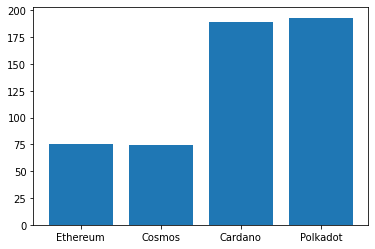

In [8]:
plt.bar(('Ethereum','Cosmos','Cardano','Polkadot'),[commitseth90.totalCount, commitscosmos90.totalCount, commitsCardano90a.totalCount+commitsCardano90b.totalCount+commitsCardano90c.totalCount, commitsPolkadot90a.totalCount + commitsPolkadot90b.totalCount])

Contributors


<BarContainer object of 4 artists>

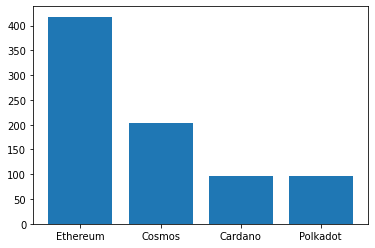

In [9]:
plt.bar(('Ethereum','Cosmos','Cardano','Polkadot'),[contrieth.totalCount, totalCosmosContri, totalCardanoContri, totalCardanoContri])

Open Issues in Repository

<BarContainer object of 4 artists>

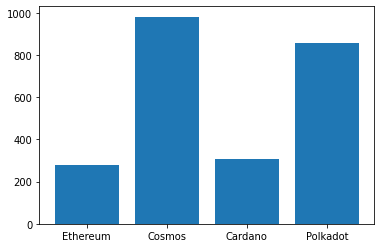

In [16]:
issueseth = repoeth.get_issues(state="open")

issueCosmosa= repocosmos.get_issues(state="open").totalCount
issueCosmosb= repoCosmosEthermint.get_issues(state="open").totalCount
issueCosmosc= repoCosmosTendermint.get_issues(state="open").totalCount

issueCardanoa = repoCardanoBase.get_issues(state="open").totalCount
issueCardanob = repoCardanoNode.get_issues(state="open").totalCount
issueCardanoc = repoCardanoPlutus.get_issues(state="open").totalCount

issuePolkadota = repoPolkadot.get_issues(state="open").totalCount
issuePolkadotb = repoPolkadotSubstrate.get_issues(state="open").totalCount

plt.bar(('Ethereum','Cosmos','Cardano','Polkadot'),[issueseth.totalCount, issueCosmosa + issueCosmosb+ issueCosmosc, issueCardanoa + issueCosmosb + issueCardanoc, issuePolkadota + issuePolkadotb])

Closed Issues


In [18]:
closeIssueEth = repoeth.get_issues(state="closed").totalCount
closeIssueCosmos = repoCosmosEthermint.get_issues(state="closed").totalCount + repoCosmosTendermint.get_issues(state="closed").totalCount + repocosmos.get_issues(state="closed").totalCount
closeIssueCardano = repoCardanoBase.get_issues(state="closed").totalCount + repoCardanoNode.get_issues(state="closed").totalCount + repoCardanoPlutus.get_issues(state="closed").totalCount + repoCardanoSL.get_issues(state="closed").totalCount


10941


Open Pull Requests

<BarContainer object of 4 artists>

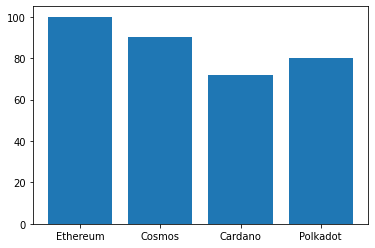

In [17]:
openPullRequestEth = repoeth.get_pulls(state="open").totalCount
openPullRequestCardano = repoCardanoBase.get_pulls(state="open").totalCount + repoCardanoNode.get_pulls(state="open").totalCount + repoCardanoPlutus.get_pulls(state="open").totalCount
openPullRequestCosmos = repoCosmosEthermint.get_pulls(state="open").totalCount + repoCosmosTendermint.get_pulls(state="open").totalCount + repocosmos.get_pulls(state="open").totalCount
openPullRequestPolkadot = repoPolkadot.get_pulls(state="open").totalCount + repoPolkadotSubstrate.get_pulls(state="open").totalCount

plt.bar(('Ethereum','Cosmos','Cardano','Polkadot'),[openPullRequestEth, openPullRequestCosmos, openPullRequestCardano, openPullRequestPolkadot])

Overall Score

Track certain wallets and 

In [ ]:
OverallEth = 1

